#                               Data analysis project

## first load the data and discribe it

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import re
from datetime import datetime
import seaborn as sns

In [2]:
url = "https://docs.google.com/spreadsheets/d/1eElpVIC7tAO7u9pqzjZtMiydSYI6EvJn/export?format=csv&gid=875801324"
IEEE_ZSB_Database_24 = pd.read_csv(url)

In [3]:
print(IEEE_ZSB_Database_24.describe(include='all'))

        Unnamed: 0  Unnamed: 1 Committee\Chapter  Unnamed: 3  Unnamed: 4  \
count          0.0         0.0               296         0.0         0.0   
unique         NaN         NaN                12         NaN         NaN   
top            NaN         NaN               PES         NaN         NaN   
freq           NaN         NaN                87         NaN         NaN   
mean           NaN         NaN               NaN         NaN         NaN   
std            NaN         NaN               NaN         NaN         NaN   
min            NaN         NaN               NaN         NaN         NaN   
25%            NaN         NaN               NaN         NaN         NaN   
50%            NaN         NaN               NaN         NaN         NaN   
75%            NaN         NaN               NaN         NaN         NaN   
max            NaN         NaN               NaN         NaN         NaN   

        Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8       Faculty  \
count          

In [4]:
IEEE_ZSB_Database_24

,Unnamed: 0,Unnamed: 1,Committee\Chapter,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Unnamed: 14,Expected year of graduation
0,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,2nd mecha power,10th of ramadan city,2003,NaN,NaN,2026
1,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,3rd year,Hehia,2003,NaN,NaN,2026
2,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,NaN,2025
3,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,3rd year,10th of Ramadan city,7/20/2003,NaN,NaN,2026
4,NaN,NaN,Ambassadors,NaN,NaN,NaN,NaN,NaN,NaN,Faculty of Arts Sociology *,4th year,Belbies,10/10/2003,NaN,NaN,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,3rd year,Zefta,6/4/2003,NaN,NaN,2026
292,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,4th year,Zagazig,12/8/2002,NaN,NaN,Engineering
293,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,Engineering,4th year,Belbais,7/6/2002,NaN,NaN,2025
294,NaN,NaN,WIE,NaN,NaN,NaN,NaN,NaN,NaN,engineering,3rd year,fakous,5/20/2003,RAS,NaN,2026


# Cleaning data

### Drop rows or columns with missing values

In [5]:
not_important_colunms = IEEE_ZSB_Database_24.columns[IEEE_ZSB_Database_24.isna().all()]

In [6]:
IEEE_ZSB_Database_24= IEEE_ZSB_Database_24.drop(columns=not_important_colunms)
IEEE_ZSB_Database_24

,Committee\Chapter,Faculty,Grade,City,Date of birth,"If you're part of two teams, what's of your second team?",Expected year of graduation
0,Ambassadors,Engineering,2nd mecha power,10th of ramadan city,2003,NaN,2026
1,Ambassadors,Engineering,3rd year,Hehia,2003,NaN,2026
2,Ambassadors,Faculty Of Commerce Credit Hours English program,3rd year,Zagazig,3/18/2003,NaN,2025
3,Ambassadors,Engineering,3rd year,10th of Ramadan city,7/20/2003,NaN,2026
4,Ambassadors,Faculty of Arts Sociology *,4th year,Belbies,10/10/2003,NaN,2025
...,...,...,...,...,...,...,...
291,WIE,Engineering,3rd year,Zefta,6/4/2003,NaN,2026
292,WIE,Engineering,4th year,Zagazig,12/8/2002,NaN,Engineering
293,WIE,Engineering,4th year,Belbais,7/6/2002,NaN,2025
294,WIE,engineering,3rd year,fakous,5/20/2003,RAS,2026


### Check for duplicate rows and remove this rows 

In [7]:
print(IEEE_ZSB_Database_24.duplicated().sum())

9


In [8]:
IEEE_ZSB_Database_24.drop_duplicates(inplace=True)

#### rename the "If you're part of two teams, what's of your second team?" column and replace nan value 

In [9]:
IEEE_ZSB_Database_24.rename(columns={"If you're part of two teams, what's of your second team?": 'the second team'}, inplace=True)

In [10]:
IEEE_ZSB_Database_24['the second team'] = IEEE_ZSB_Database_24['the second team'].fillna(' ')

### Convert columns [ "Faculty" , "City"] values to lowercase

In [11]:
IEEE_ZSB_Database_24.columns = IEEE_ZSB_Database_24.columns.str.strip()

IEEE_ZSB_Database_24["Faculty"] = IEEE_ZSB_Database_24["Faculty"].str.lower()
IEEE_ZSB_Database_24["City"] = IEEE_ZSB_Database_24["City"].str.lower()
IEEE_ZSB_Database_24

,Committee\Chapter,Faculty,Grade,City,Date of birth,the second team,Expected year of graduation
0,Ambassadors,engineering,2nd mecha power,10th of ramadan city,2003,,2026
1,Ambassadors,engineering,3rd year,hehia,2003,,2026
2,Ambassadors,faculty of commerce credit hours english program,3rd year,zagazig,3/18/2003,,2025
3,Ambassadors,engineering,3rd year,10th of ramadan city,7/20/2003,,2026
4,Ambassadors,faculty of arts sociology *,4th year,belbies,10/10/2003,,2025
...,...,...,...,...,...,...,...
291,WIE,engineering,3rd year,zefta,6/4/2003,,2026
292,WIE,engineering,4th year,zagazig,12/8/2002,,Engineering
293,WIE,engineering,4th year,belbais,7/6/2002,,2025
294,WIE,engineering,3rd year,fakous,5/20/2003,RAS,2026


### Clean the Grade column and Convert 'Grade' to numeric

In [12]:
grade_mapping = {
    '1st year': '1',
    '2nd year': '2',
    '3rd year': '3',
    '4th year': '4',
    '5th year': '5',
    '1': '1',
    '2': '2',
    '3': '3',
    '4': '4',
    '5': '5',
    'Fourth': '4',
    'Third': '3',
    '3ʳᵈ': '3',
    'In the Fourth year': '4',
    'Good': None, 
    '': None,  
}

IEEE_ZSB_Database_24['Grade'] = IEEE_ZSB_Database_24['Grade'].map(grade_mapping)
IEEE_ZSB_Database_24['Grade'] = pd.to_numeric(IEEE_ZSB_Database_24['Grade'], errors='coerce')


###  write the dates in a correct format 

In [13]:

def parse_dates(IEEE_ZSB_Database_24):
    formats = ['%Y', '%m/%d/%Y', '%d/%m/%Y', '%m-%d-%Y', '%d-%m-%Y', '%Y-%m-%d', '%Y/%m/%d']
    for fmt in formats:
        try:
            return pd.to_datetime(IEEE_ZSB_Database_24, format=fmt)
        except ValueError:
            pass
    return pd.NaT

IEEE_ZSB_Database_24['Date of birth'] = IEEE_ZSB_Database_24['Date of birth'].apply(parse_dates)

### Filter out invalid dates (dates greater than today's date)

In [14]:
IEEE_ZSB_Database_24 = IEEE_ZSB_Database_24[IEEE_ZSB_Database_24['Date of birth'].notnull() & (IEEE_ZSB_Database_24['Date of birth'] < datetime.now())]

IEEE_ZSB_Database_24.reset_index(drop=True, inplace=True)

#### Add a new column "age" in the data to calculate the age of each member  

In [15]:
IEEE_ZSB_Database_24['Age'] = pd.to_datetime('now').year - IEEE_ZSB_Database_24['Date of birth'].dt.year

C:\Users\QQ\AppData\Local\Temp\ipykernel_18820\2465147198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IEEE_ZSB_Database_24['Age'] = pd.to_datetime('now').year - IEEE_ZSB_Database_24['Date of birth'].dt.year


In [16]:
IEEE_ZSB_Database_24.head(20)

,Committee\Chapter,Faculty,Grade,City,Date of birth,the second team,Expected year of graduation,Age
0,Ambassadors,engineering,NaN,10th of ramadan city,2003-01-01,,2026,21
1,Ambassadors,engineering,3.0,hehia,2003-01-01,,2026,21
2,Ambassadors,faculty of commerce credit hours english program,3.0,zagazig,2003-03-18,,2025,21
3,Ambassadors,engineering,3.0,10th of ramadan city,2003-07-20,,2026,21
4,Ambassadors,faculty of arts sociology *,4.0,belbies,2003-10-10,,2025,21
5,Ambassadors,computer and information zagazig university,2.0,zagazig,2004-05-05,,2026,20
6,Ambassadors,arts of sociology,3.0,el-sharkia,2003-03-15,,2025,21
7,Ambassadors,faculty of agriculture,3.0,zagazig,2003-08-14,,2025,21
8,Ambassadors,engineering,3.0,hahia,2003-01-15,,2026,21
9,BD,engineering,4.0,zagazig,2002-01-01,RAS,2025,22


### clean the "Expected year of graduation" column by removing each string value

In [17]:
IEEE_ZSB_Database_24['Expected year of graduation'] = IEEE_ZSB_Database_24['Expected year of graduation'].str.extract(r'(\b\d{4}\b)', expand=False)
IEEE_ZSB_Database_24.head(20)

C:\Users\QQ\AppData\Local\Temp\ipykernel_18820\1511894601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IEEE_ZSB_Database_24['Expected year of graduation'] = IEEE_ZSB_Database_24['Expected year of graduation'].str.extract(r'(\b\d{4}\b)', expand=False)


,Committee\Chapter,Faculty,Grade,City,Date of birth,the second team,Expected year of graduation,Age
0,Ambassadors,engineering,NaN,10th of ramadan city,2003-01-01,,2026,21
1,Ambassadors,engineering,3.0,hehia,2003-01-01,,2026,21
2,Ambassadors,faculty of commerce credit hours english program,3.0,zagazig,2003-03-18,,2025,21
3,Ambassadors,engineering,3.0,10th of ramadan city,2003-07-20,,2026,21
4,Ambassadors,faculty of arts sociology *,4.0,belbies,2003-10-10,,2025,21
5,Ambassadors,computer and information zagazig university,2.0,zagazig,2004-05-05,,2026,20
6,Ambassadors,arts of sociology,3.0,el-sharkia,2003-03-15,,2025,21
7,Ambassadors,faculty of agriculture,3.0,zagazig,2003-08-14,,2025,21
8,Ambassadors,engineering,3.0,hahia,2003-01-15,,2026,21
9,BD,engineering,4.0,zagazig,2002-01-01,RAS,2025,22


##  The percentage of people in each chapter

In [18]:
chapter_counts = IEEE_ZSB_Database_24['Committee\Chapter'].value_counts()

Text(0.5, 1.0, 'Percentage of People in Each Chapter')

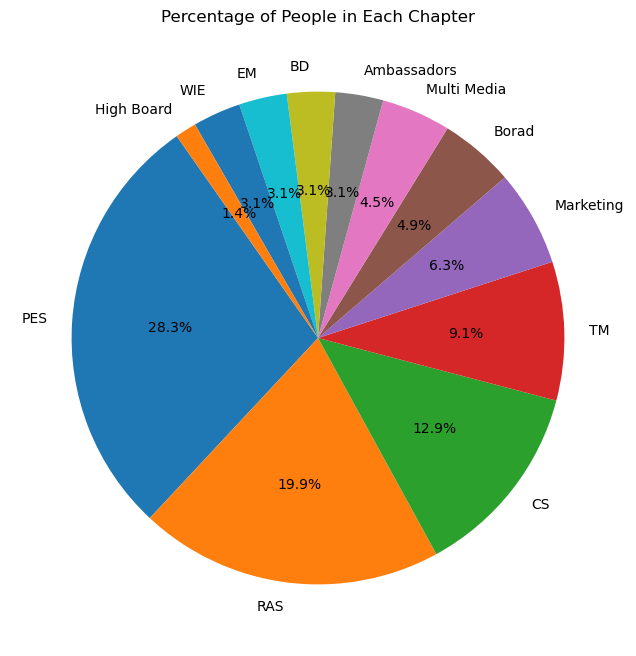

In [19]:
plt.figure(figsize=(9, 8))
plt.pie((chapter_counts / chapter_counts.sum() * 100), labels=(chapter_counts / chapter_counts.sum() * 100).index, autopct='%1.1f%%', startangle=125)
plt.title('Percentage of People in Each Chapter')

### Age Distribution: Understand age demographics in general through histograms.

Text(0.5, 0, 'Age')

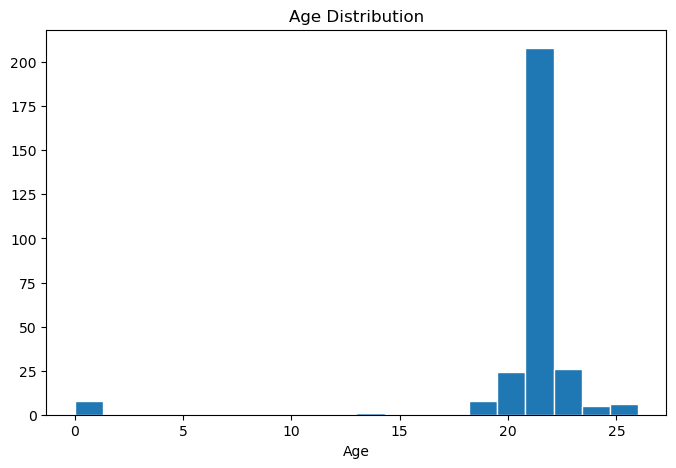

In [20]:
plt.figure(figsize=(8,5))
plt.hist(IEEE_ZSB_Database_24['Age'], bins=20, edgecolor='w')
plt.title('Age Distribution')
plt.xlabel('Age')

### Identify which cities have the highest number of members.

Text(0.5, 1.0, 'Number of Students by City')

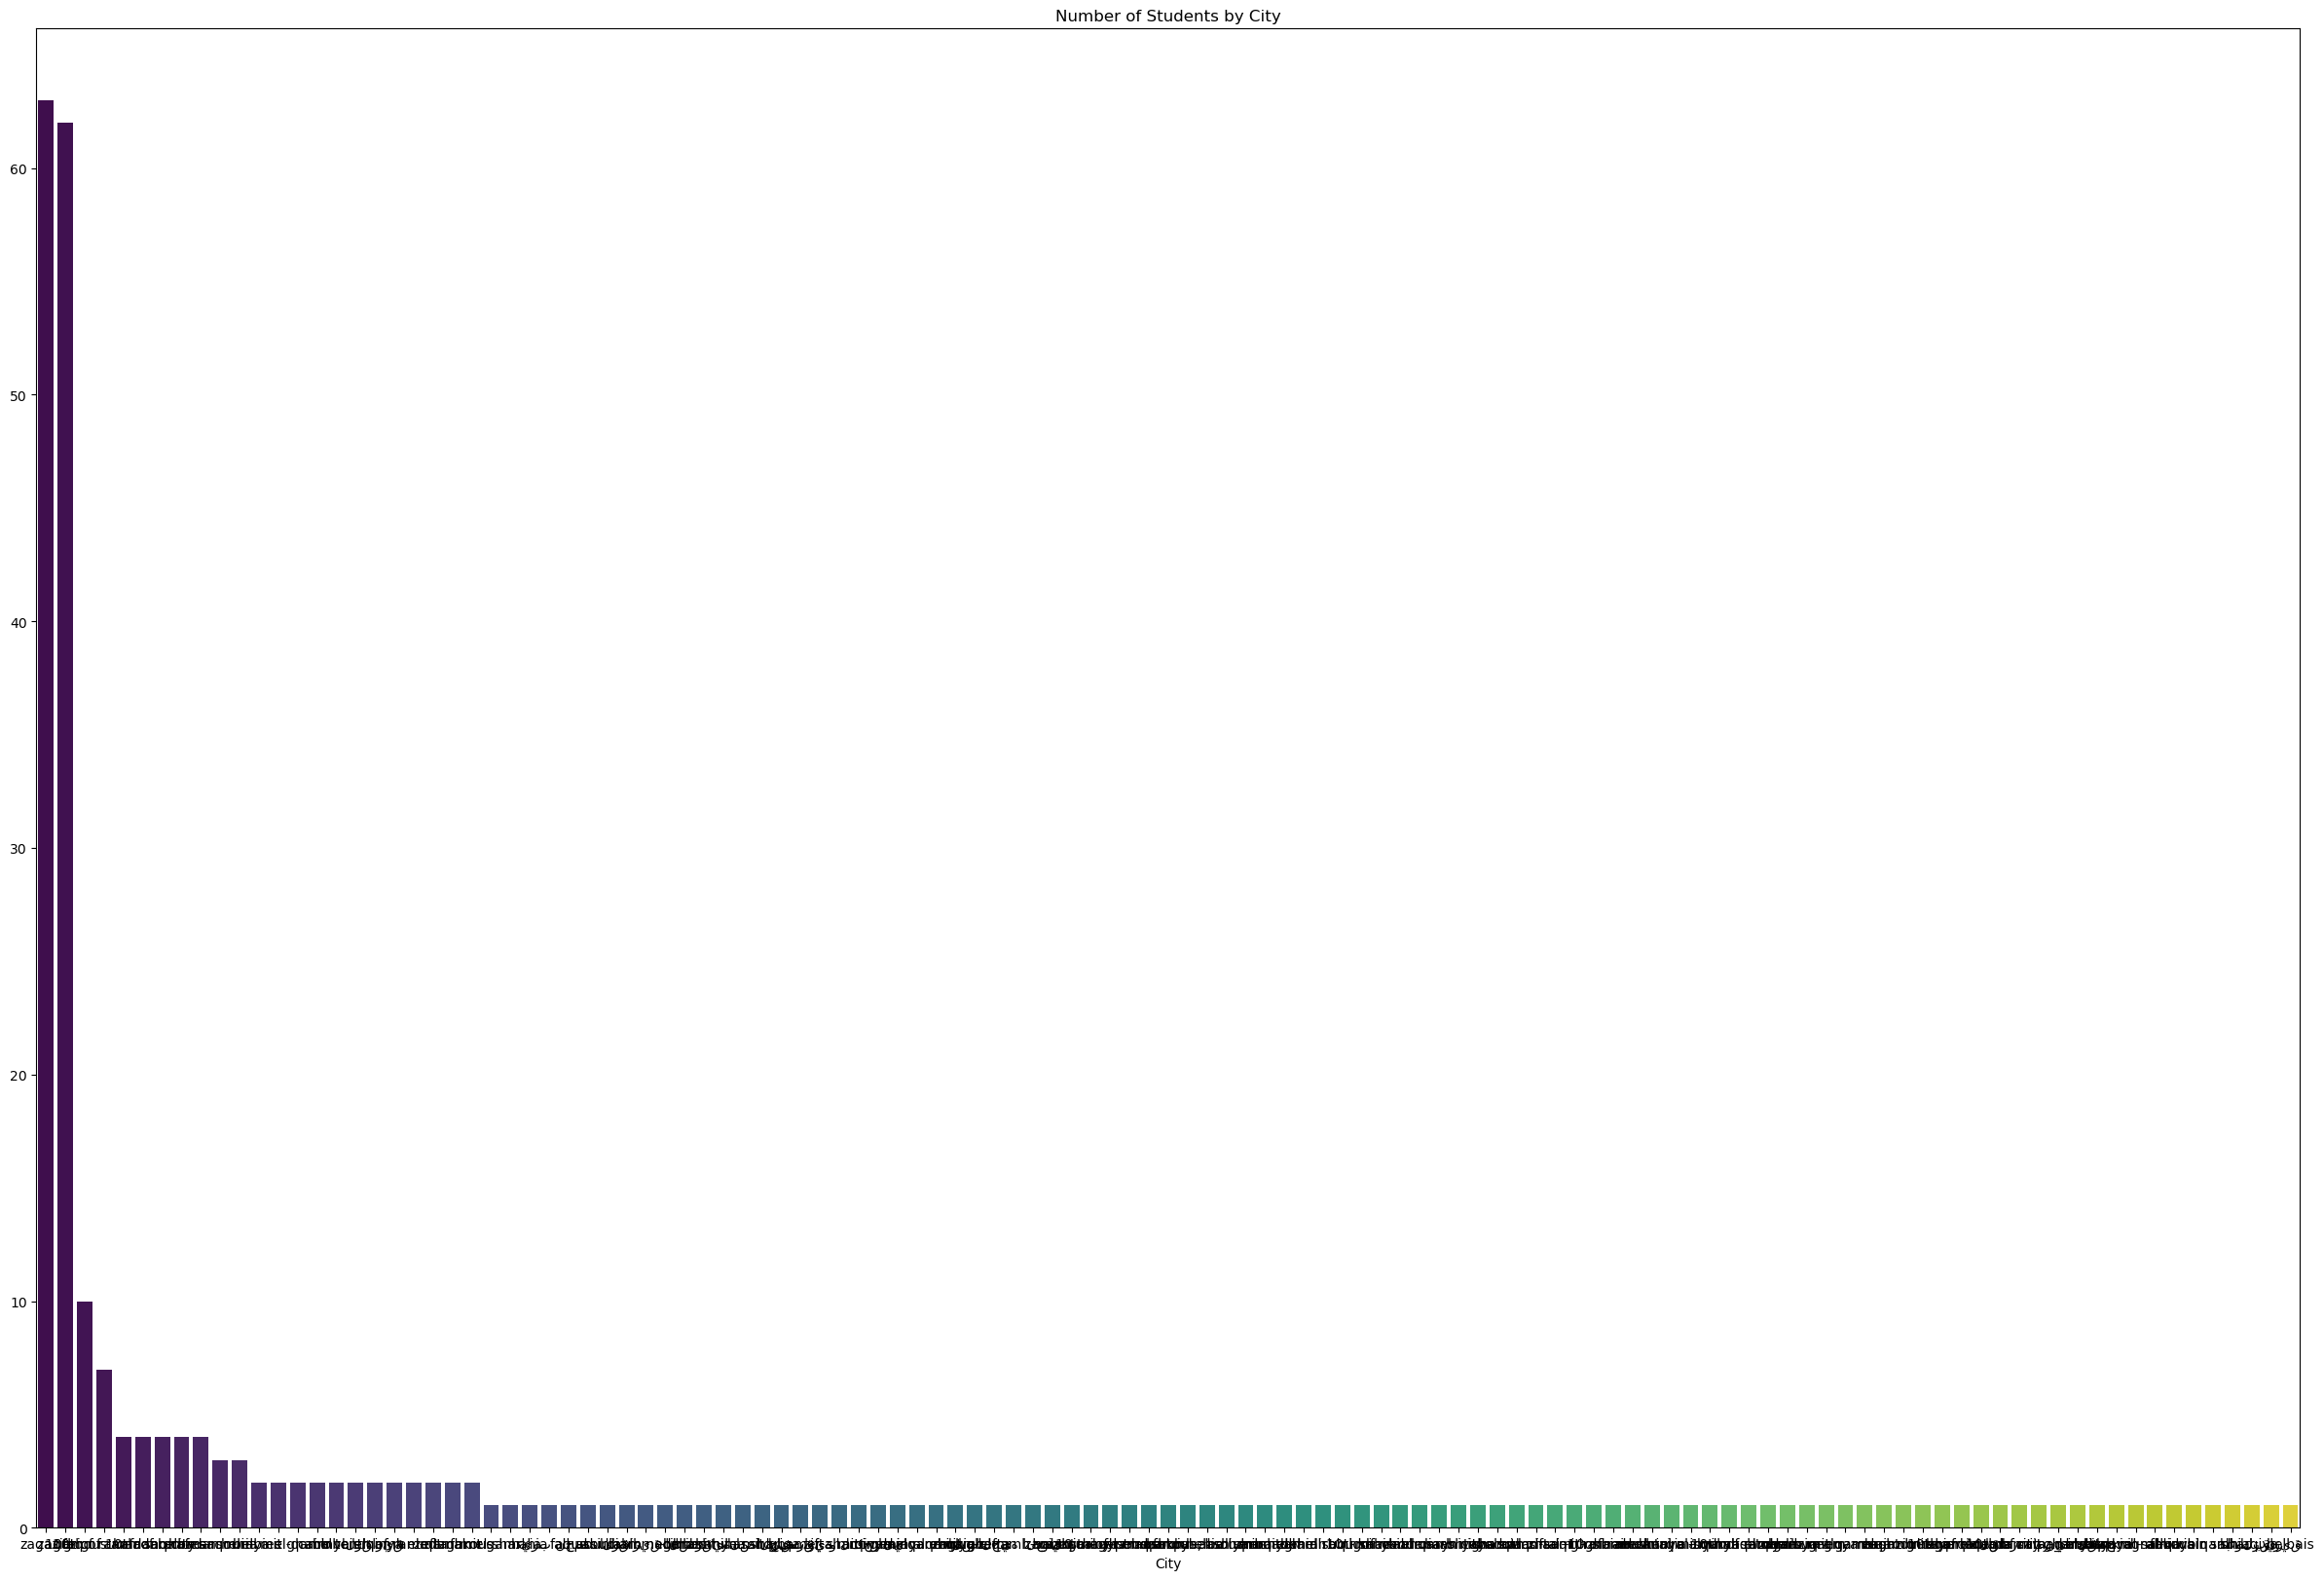

In [21]:
city_counts =  IEEE_ZSB_Database_24['City'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(30, 20))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Number of Students by City')

### Age Distribution by (Committee\Chapter)

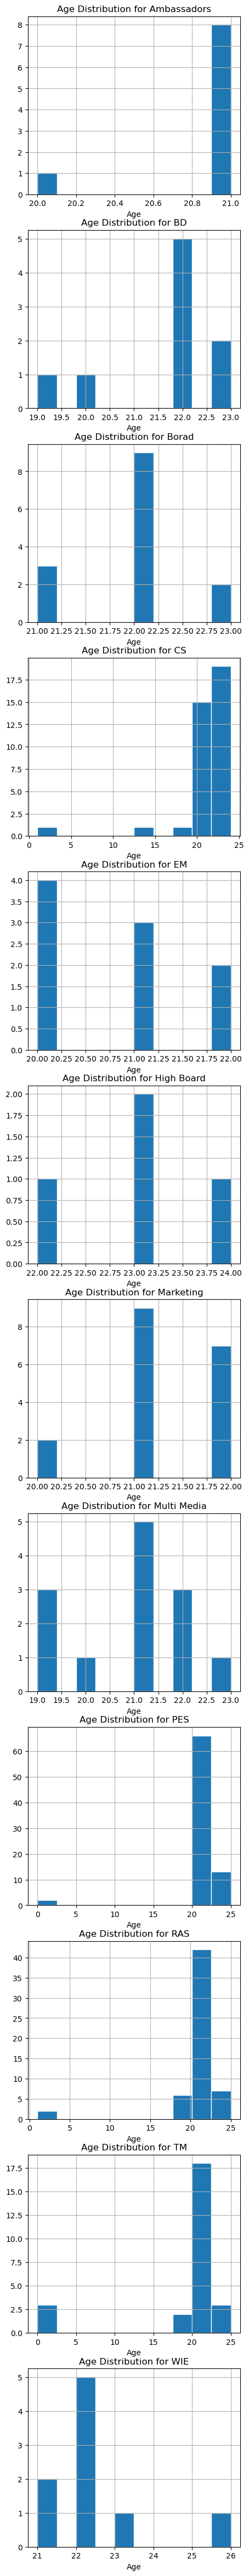

In [22]:
chapters = IEEE_ZSB_Database_24['Committee\Chapter'].unique()

fig, axes = plt.subplots(nrows=len(chapters), ncols=1, figsize=(5, 5 * len(chapters)))

for i, chapter in enumerate(chapters):
    subset = IEEE_ZSB_Database_24[IEEE_ZSB_Database_24['Committee\Chapter'] == chapter]
    axes[i].hist(subset['Age'].dropna(), bins=10, edgecolor='w')
    axes[i].set_title(f'Age Distribution for {chapter}')
    axes[i].set_xlabel('Age')
    axes[i].grid(True)


### Expected Year of Graduation Analysis by Chapter

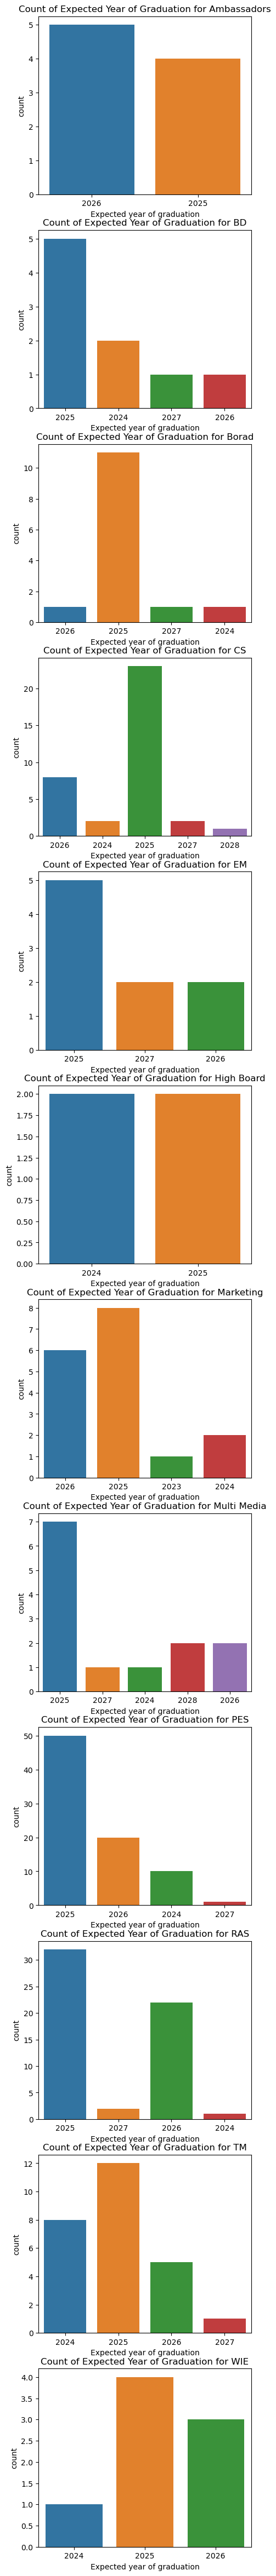

In [23]:
fig, axes = plt.subplots(nrows=len(chapters), ncols=1, figsize=(5, 5 * len(chapters)))

for i, chapter in enumerate(chapters):
    subset = IEEE_ZSB_Database_24[IEEE_ZSB_Database_24['Committee\Chapter'] == chapter]
    sns.countplot(x='Expected year of graduation', data=subset, ax=axes[i])
    axes[i].set_title(f'Count of Expected Year of Graduation for {chapter}')

### Faculty Distribution by Chapter

IndexError: index 8 is out of bounds for axis 0 with size 8

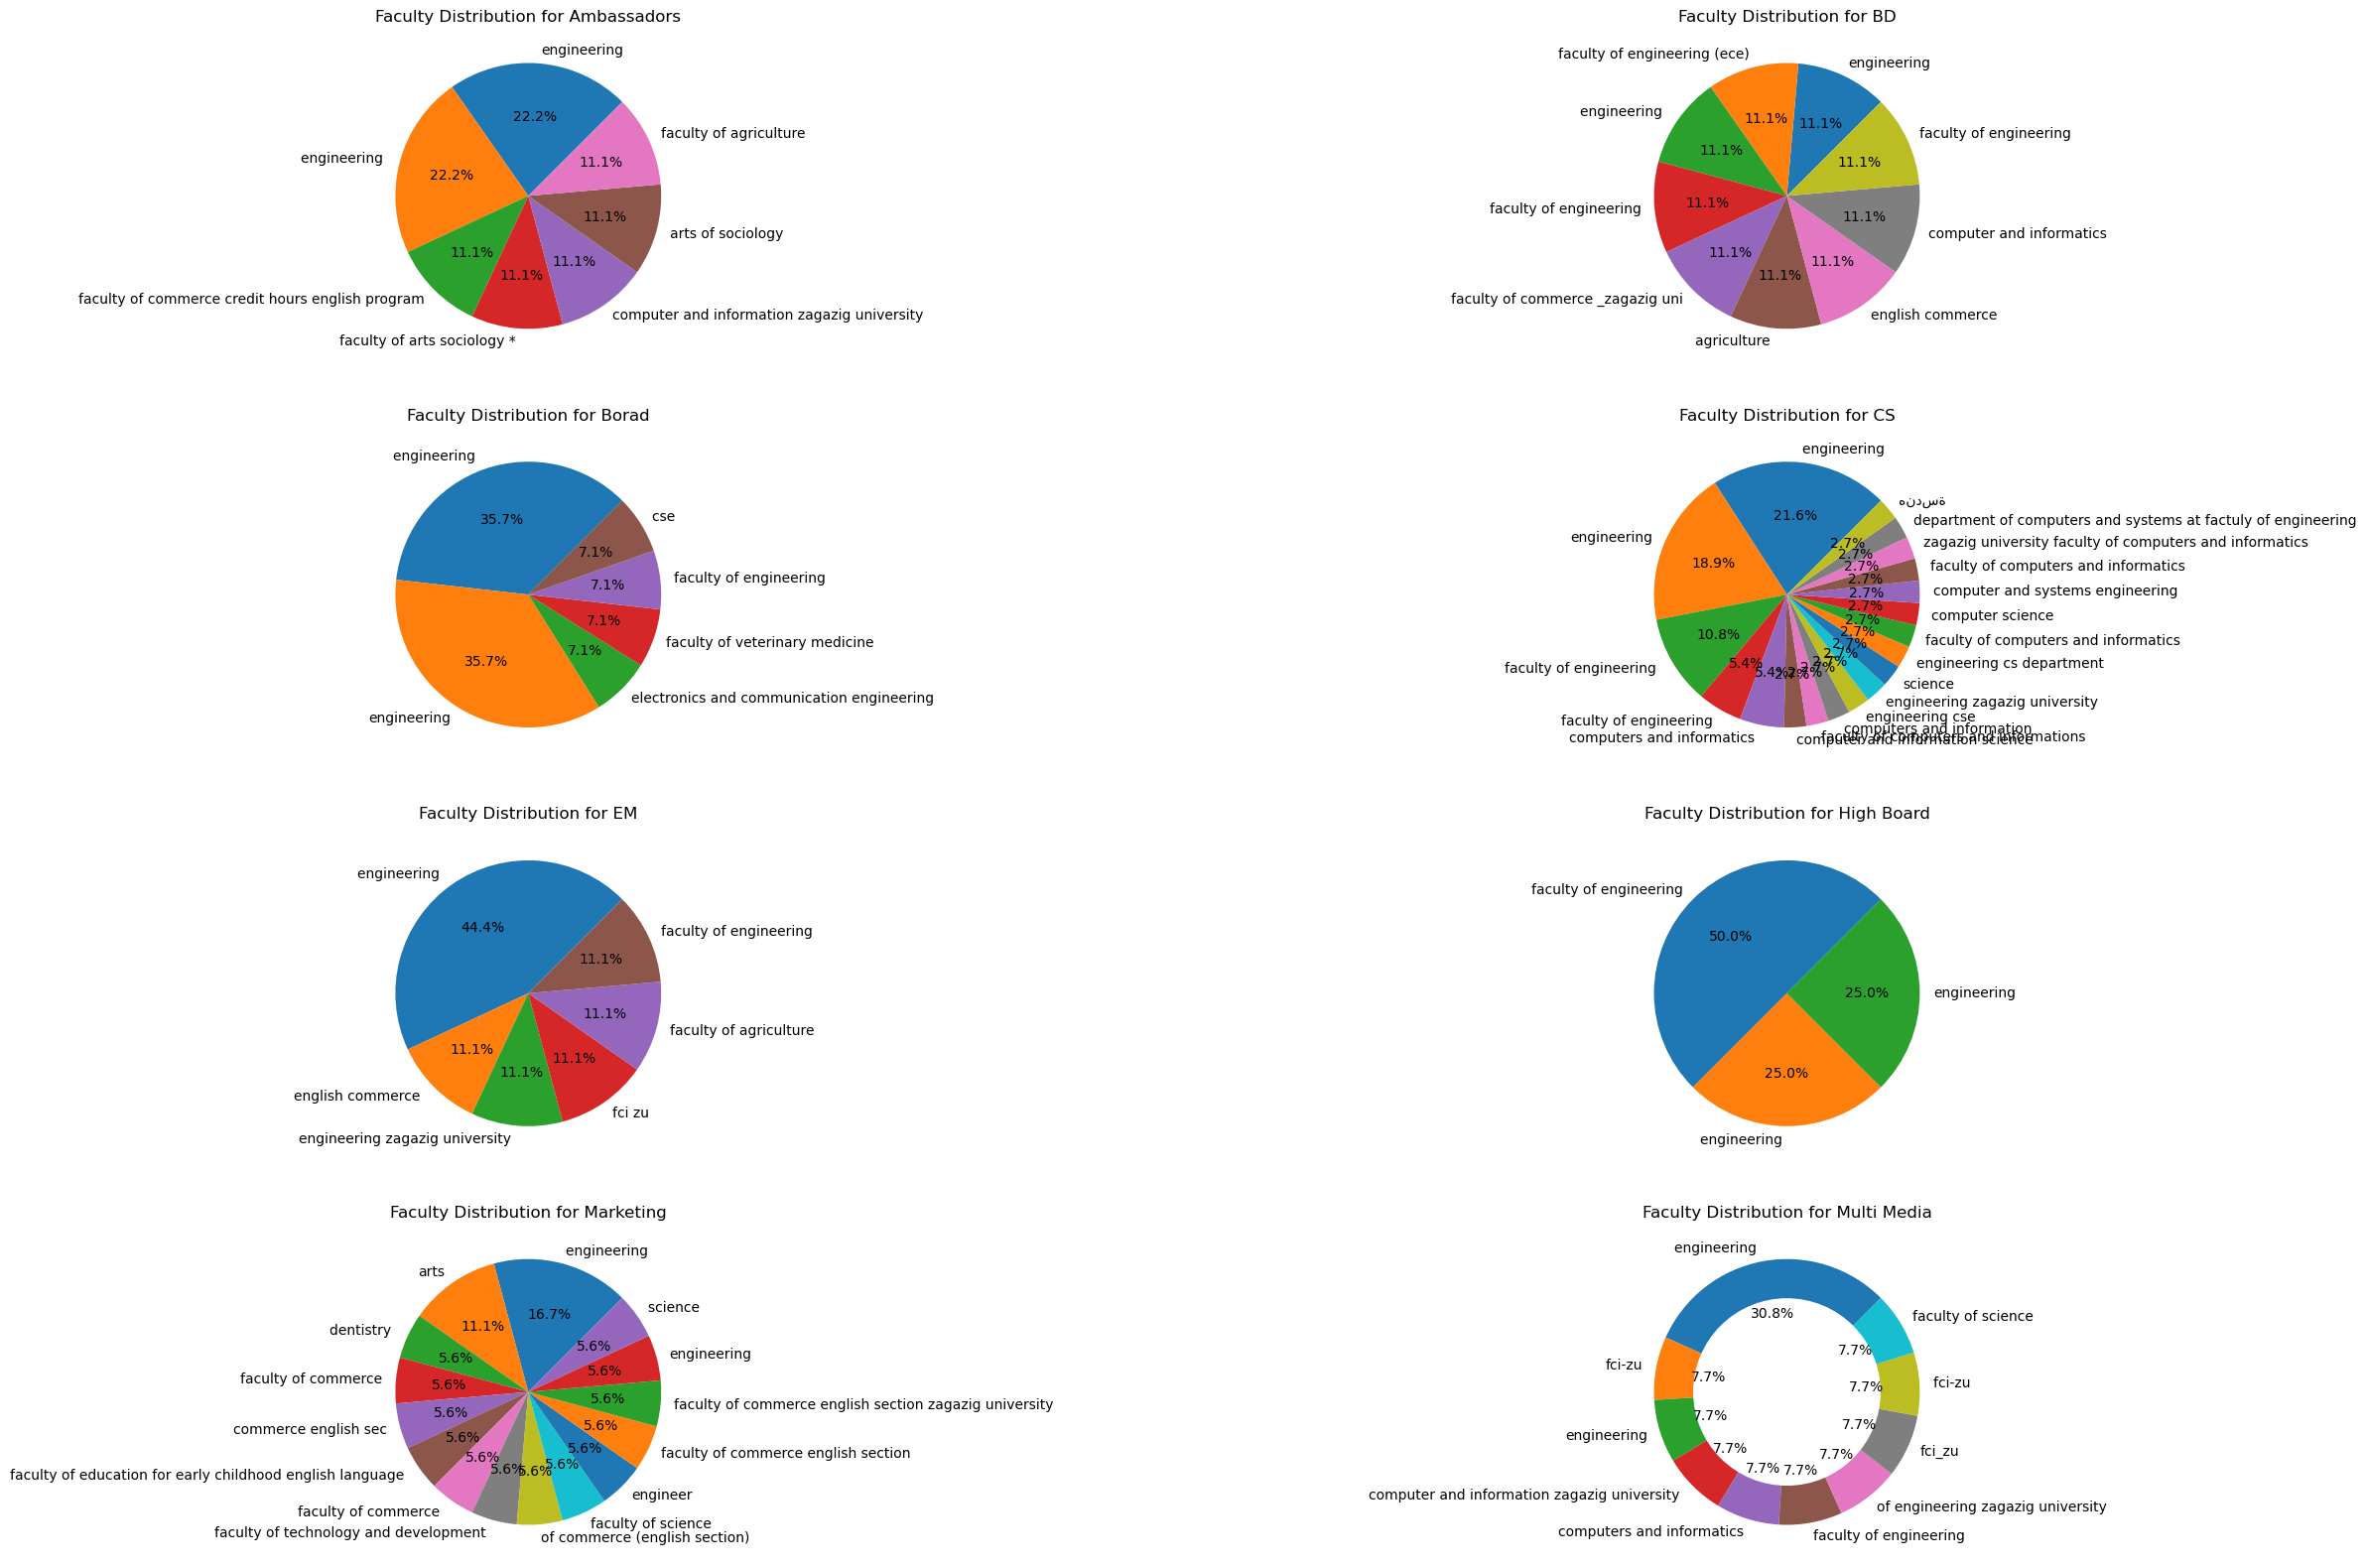

In [24]:
chapters = IEEE_ZSB_Database_24['Committee\\Chapter'].unique()
num_chapters = len(chapters)
fig, axes = plt.subplots(nrows=(num_chapters + 2) // 3, ncols=2, figsize=(30, 20))
axes = axes.flatten()
for i, chapter in enumerate(chapters):
    subset = IEEE_ZSB_Database_24[IEEE_ZSB_Database_24['Committee\\Chapter'] == chapter]
    faculty_counts = subset['Faculty'].value_counts()

    axes[i].pie(faculty_counts, labels=faculty_counts.index, autopct='%1.1f%%', startangle=45)
    axes[i].set_title(f'Faculty Distribution for {chapter}')

    my_circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')


### Relationship Between Grade and Faculty

C:\Users\QQ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\QQ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Committee\Chapter,Faculty,Grade,City,Date of birth,the second team,Expected year of graduation,Age
0,Ambassadors,engineering,NaN,10th of ramadan city,2003-01-01,,2026,21
1,Ambassadors,engineering,3.0,hehia,2003-01-01,,2026,21
2,Ambassadors,faculty of commerce credit hours english program,3.0,zagazig,2003-03-18,,2025,21
3,Ambassadors,engineering,3.0,10th of ramadan city,2003-07-20,,2026,21
4,Ambassadors,faculty of arts sociology *,4.0,belbies,2003-10-10,,2025,21
...,...,...,...,...,...,...,...,...
281,WIE,engineering,3.0,zefta,2003-06-04,,2026,21
282,WIE,engineering,4.0,zagazig,2002-12-08,,NaN,22
283,WIE,engineering,4.0,belbais,2002-07-06,,2025,22
284,WIE,engineering,3.0,fakous,2003-05-20,RAS,2026,21


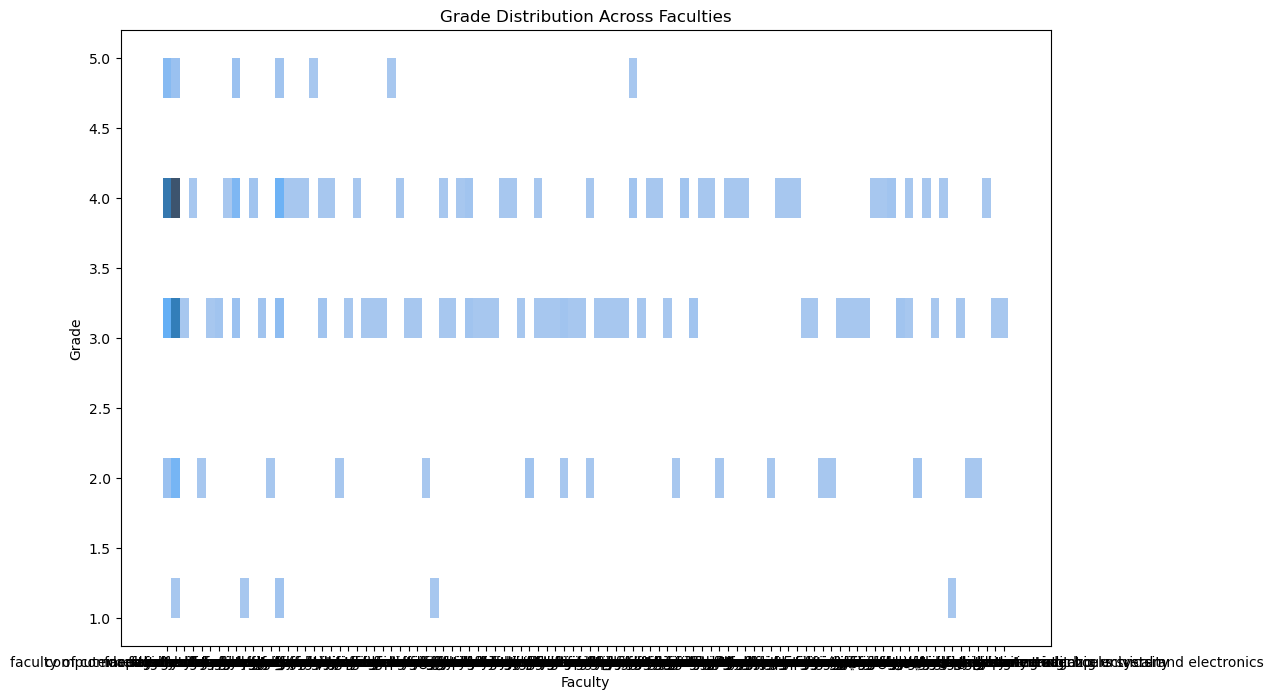

In [25]:
plt.figure(figsize=(12, 8))
sns.histplot(x='Faculty', y='Grade', data=IEEE_ZSB_Database_24)
plt.title('Grade Distribution Across Faculties')
plt.xlabel('Faculty')
plt.ylabel('Grade')
IEEE_ZSB_Database_24